# Linear Models and Interpretability

## TODO

Tasks: 
- Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met. 
- Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.
- Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.
- Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model. 
- Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.

Rubric:
- Notebook is well documented and includes details and references to the dataset and models used
- Assumptions are evaluated with exploratory data analysis and explained in markdown inside the notebook
- Code implementing the linear regression model is correct
- Code implementing the linear regression model is clear and well documented
- Linear regression model is interpreted appropriately and interpretation is discussed in markdown
- Code implementing the logistic regression model is correct
- Code implementing the logistic regression model is clear and well documented
- Logistic regression model is interpreted appropriately and interpretation is discussed in markdown
- Code implementing the GAM is correct
- Code implementing the GAM is clear and well documented
- GAM is interpreted appropriately and interpretation is discussed in markdown
- A discussion of the strengths and weaknesses of each approach is included in markdown
- Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown


## Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns

### Retrieve Dataset

The target of the analysis is the Kaggle Telco Customer Churn dataset (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data). First, we'll retrieve and validate. 

In [7]:
# NOTE: this cell straight from the Kaggle project
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

/Users/jason/Local/school/590/assignment2/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/jason/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [8]:
!ls $path

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [9]:
df = pd.read_csv(path + f"/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
assert(len(df.customerID.unique()) == len(df))

The dataset provides features about a customer, with one row per customer (who are each uniquely identified by the `customerID` column), and are now redundant given our index. 

In [11]:
df.drop(['customerID'], axis=1, inplace=True) 

### Characterize Predictors

Next we'll inspect the predictor variables and characterize their distribution as well as their relationship to one another. 

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
len(df.columns)

20

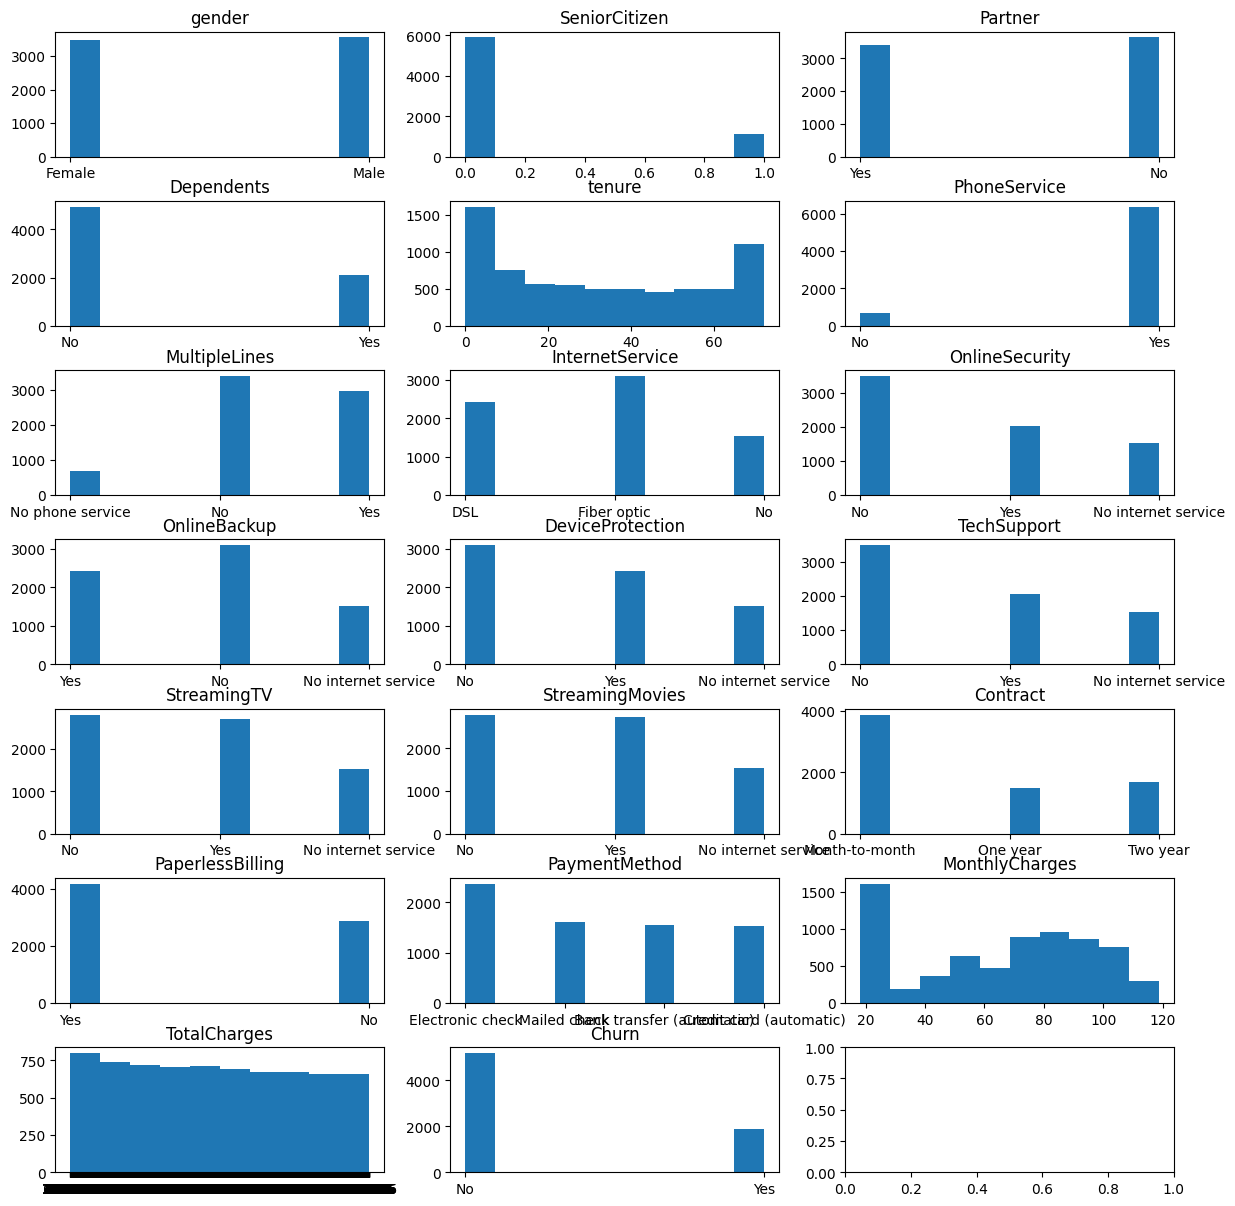

In [14]:
# Plot the distribution of all variables, minus the customer ID, which is a unique identifier
features = df.columns
h = 7
w = 3
fig, axs = plt.subplots(h,w, figsize=(12,12))
fig.tight_layout()
for i, feature in enumerate(features): 
     row = i // w
     col = i % w
     axs[row, col].hist(df[feature])
     axs[row, col].set_title(feature)
     
plt.show()
     

**Linearity Check** 

Inspect the predictors' relationship with the target

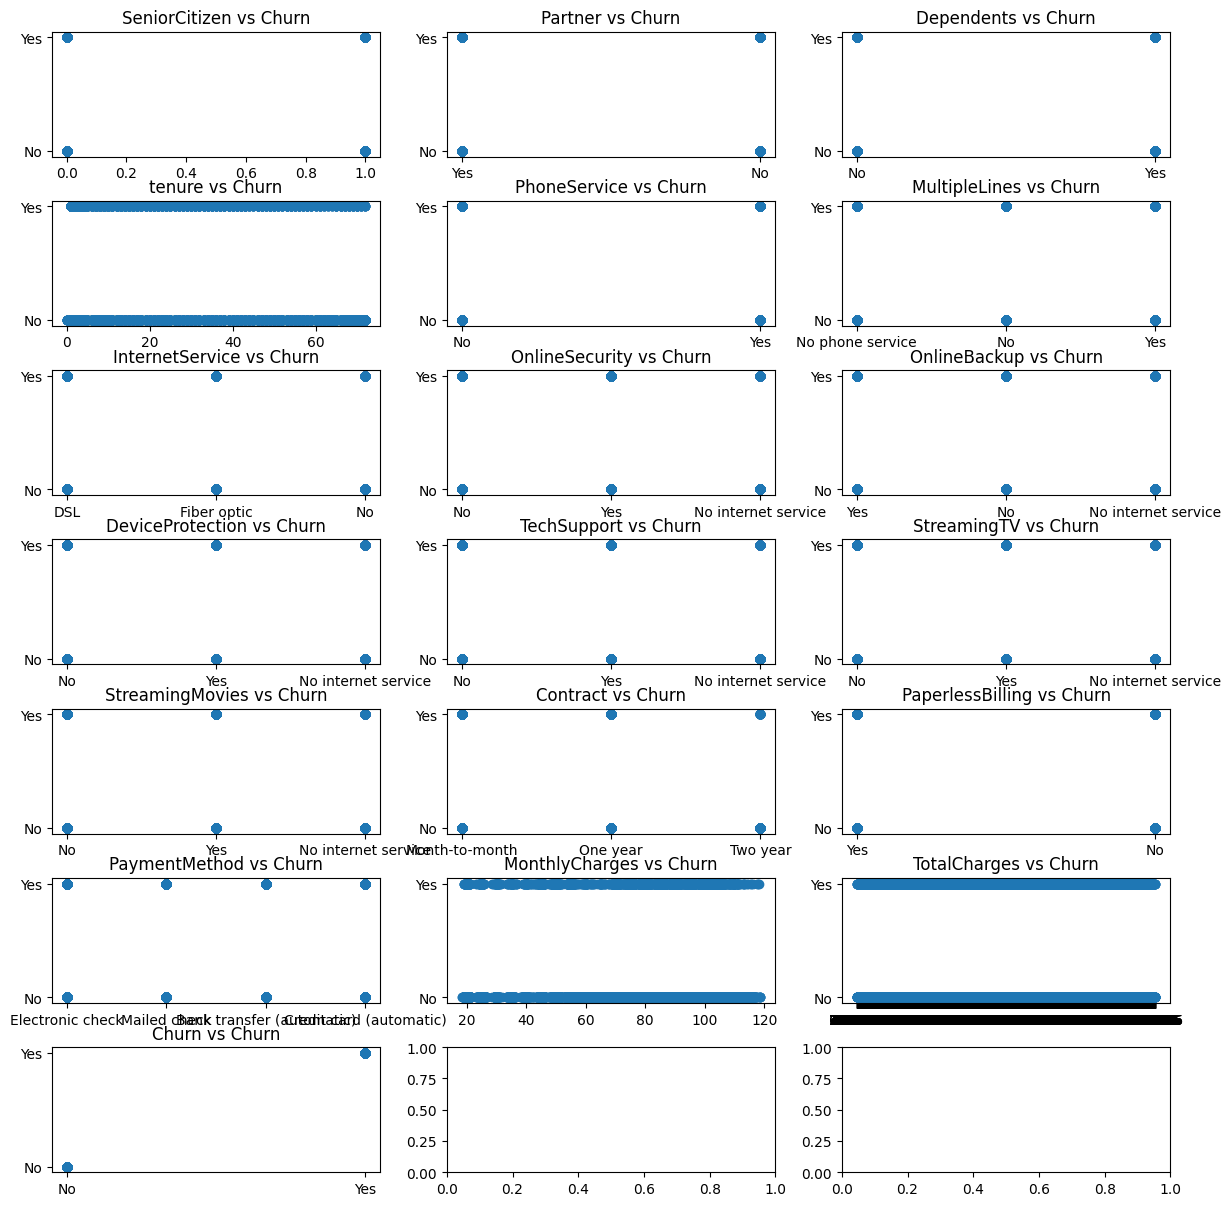

In [15]:
features = df.columns[1:]
target = "Churn"
h = 7
w = 3
fig, axs = plt.subplots(h,w, figsize=(12,12))
fig.tight_layout()
for i, feature in enumerate(features): 
     row = i // w
     col = i % w
     axs[row, col].scatter(x=df[feature], y=df[target])
     axs[row, col].set_title(f"{feature} vs {target}")
     
plt.show()
     

The only linear relationship that's evident here is between churn and itself, no intervention appears to be necessary here.

**Independence** 

To test correlation we need a numerical representation of each feature. Inventory the unique values and encode using the appropriate method (binarize or one-hot)

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
from sklearn.preprocessing import binarize, label_binarize, OneHotEncoder

In [18]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [19]:
df.gender = label_binarize(df.gender, classes=df.gender.unique())
df.Partner = label_binarize(df.Partner, classes=df.Partner.unique())
df.Dependents = label_binarize(df.Dependents, classes=df.Dependents.unique())
df.PhoneService = label_binarize(df.PhoneService, classes=df.PhoneService.unique())
df.PaperlessBilling = label_binarize(df.PaperlessBilling, classes=df.PaperlessBilling.unique())
df.Churn = label_binarize(df.Churn, classes=df.Churn.unique())

In [20]:
def onehot_encode(df, column, drop_source=True): 
    """
    One-hot encode the target column
    """
    enc = OneHotEncoder(handle_unknown='error', sparse_output=False)
    onehot = enc.fit_transform(df.loc[:,[column]])
    for i, feature in enumerate(enc.get_feature_names_out()): 
        df[feature] = onehot[:,i]

    return df.drop([column], axis=1) if drop_source else df

In [21]:
df = onehot_encode(df, 'MultipleLines')
df = onehot_encode(df, 'InternetService')
df = onehot_encode(df, 'OnlineSecurity')
df = onehot_encode(df, 'OnlineBackup')
df = onehot_encode(df, 'DeviceProtection')
df = onehot_encode(df, 'TechSupport')
df = onehot_encode(df, 'StreamingTV')
df = onehot_encode(df, 'StreamingMovies')
df = onehot_encode(df, 'Contract')
df = onehot_encode(df, 'PaymentMethod')

In [22]:
df.TotalCharges = df.TotalCharges.apply(lambda x: 0 if x==' ' else x)
df.TotalCharges = df.TotalCharges.astype(float)

In [23]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,0.011754,-0.014569,-0.000080,-0.008612,...,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,-0.156530,0.220173,0.103006,0.150889,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.014877,-0.096848,-0.317504,0.150448,...,0.117529,-0.000615,-0.117412,0.280865,-0.082783,-0.248091,-0.110706,-0.082029,0.083852,0.095125
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,0.111377,-0.113890,0.062078,-0.164221,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,-0.006152,0.247900,0.826178,-0.352229,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,-0.016505,0.247398,0.113214,0.011942,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,0.011754,-0.156530,-0.014877,0.111377,-0.006152,-0.016505,1.000000,-0.352150,-0.158574,-0.191825,...,-0.059488,0.321013,-0.211716,-0.169096,0.051391,0.147889,0.016332,0.013589,-0.208865,0.205398
MonthlyCharges,-0.014569,0.220173,-0.096848,-0.113890,0.247900,0.247398,-0.352150,1.000000,0.651174,0.193356,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,-0.000080,0.103006,-0.317504,0.062078,0.826178,0.113214,-0.158574,0.651174,1.000000,-0.198324,...,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,0.185987,0.182915,-0.059246,-0.295758
Churn,-0.008612,0.150889,0.150448,-0.164221,-0.352229,0.011942,-0.191825,0.193356,-0.198324,1.000000,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683


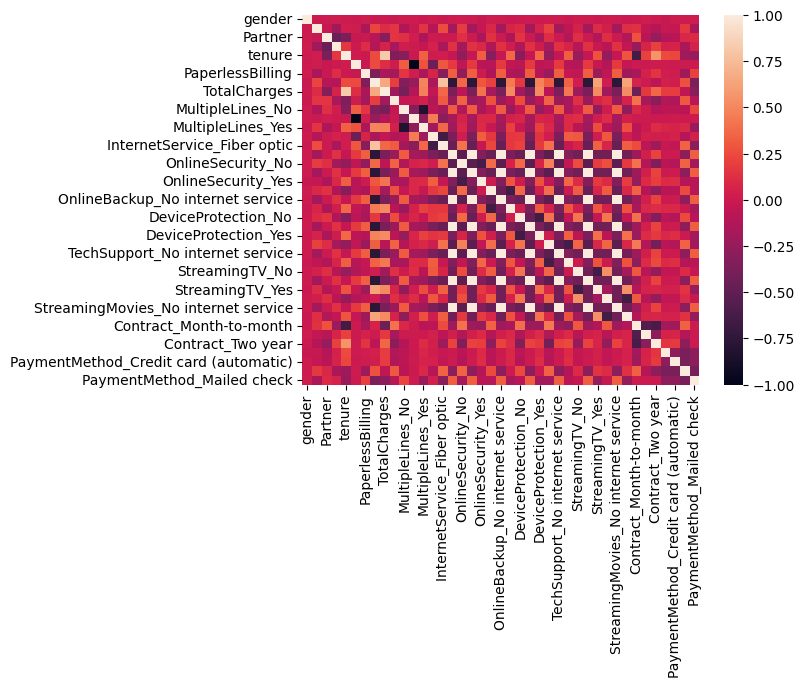

In [26]:
_ = sns.heatmap(df.corr())

In [24]:
from scipy.stats import pearsonr

def pearson_similarity(a, b):
    """
    Compute Pearson similarity

    NOTE: borrowed from prior deep learning project, see https://github.com/auto-d/deepcart/blob/6f42a373353791d9049d49942a0ad5c2a83bb667/similarity.py#L27
    """
    return (1 + pearsonr(a, b).statistic) / 2

## Modeling

### Linear Regression

### Logistic Regression 

### Generalized Additive Model 

### Comparison of Models